In [4]:
import matplotlib.pyplot as plt
import math

def fun(x):
    return -0.25*x**2+3

0.020000000000000004 (Условие устойчивости разностной системы <= 0.5)
Таблица


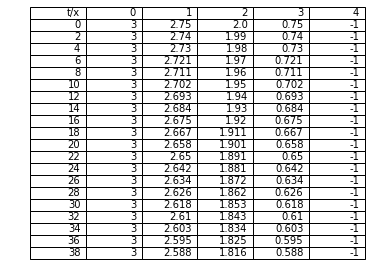

In [19]:
a = 0.1 #коэф. температуропроводности
dx = 1
dt = 2
l = 3 #температура слева стержня
r = -1 #температура справа стержня
sl = 20 #число временных слоёв
lenght = 4 #длина стержня
TABLE_ON = True

print((a**2*dt)/dx**2, "(Условие устойчивости разностной системы <= 0.5)")

x_len = int((lenght//dx)+1)
times = [dt*sl for sl in range(0, sl)]
X = [i*dx for i in range(0, x_len)]

left = [l]*sl
right = [r]*sl
TABLE = [[0]*sl]*x_len
TABLE[0] = left
TABLE[x_len-1] = right

for i in range(1, x_len-1):
    temp = [0]*sl
    temp[0] = fun(X[i])
    TABLE[i] = temp

for j in range(1, sl):
    for i in range(1, x_len-1):
        v = TABLE[i][j-1]+(a**2*dt/(dx**2))*(TABLE[i+1][j-1]-2*TABLE[i][j-1]+TABLE[i-1][j-1])
        TABLE[i][j]=v
        
if TABLE_ON:
    HEAD = ["t/x"]
    for i in range(0, x_len):
        HEAD.append(X[i])
    HEAD = [HEAD]    

    TAB = []
    for i in range(0, sl):
        temp = [round(dt*i, 3)]
        for j in range(0, x_len):
            temp.append(round(TABLE[j][i], 3))
        TAB.append(temp)

    table = plt.table(cellText=HEAD+TAB, loc='center')
    #table.auto_set_font_size(False)
    #table.set_fontsize(30)
    #table.scale(4.5, 4.5)
    plt.axis("off")
    print("Таблица")

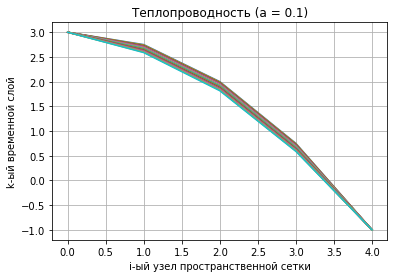

In [16]:
plt.grid()
plt.xlabel("i-ый узел пространственной сетки")
plt.ylabel("k-ый временной слой")
plt.title("Теплопроводность (a = "+str(a)+")")
for i in range(0, sl):
    s = [TABLE[j][i] for j in range(0, x_len)]
    plt.plot(X, s)
